## MDSS SCAN ON AUTOSTRAT MODE 

Import the MDSS module and Bernoulli modules

In [1]:
import pandas as pd

import warnings
from pandas.api.types import is_numeric_dtype

warnings.filterwarnings('ignore')

### Data

In [2]:
compas = pd.read_csv('../datasets/default_of_credit_card_clients.csv')
compas

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
compas.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [4]:
numeric_cols = [col for col in compas.columns if (is_numeric_dtype(compas[col]) == True) & (compas[col].nunique() > 11)]
numeric_cols

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [5]:
compas.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
compas.shape

(30000, 24)

In [7]:
compas.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
dff = compas.dropna()

target_col = 'default payment next month'
search_space = list(dff.drop(columns=[target_col]).columns)

for col in numeric_cols:
    dff[col] = pd.qcut(dff[col], 10, duplicates='drop')
    dff[col] = dff[col].apply(lambda x: str(round(x.left, 2)) + ' - ' + str(round(x.right,2)))

for col in search_space:
    dff[col] = dff[col].astype(str)

dff[target_col] =  dff[target_col].astype(int)
target = dff[target_col].copy()
expected_prob = dff[target_col].mean()
dff['expected'] = expected_prob
results = []


In [9]:
expected_prob

0.2212

### MDSS

In [10]:
from aif360.detectors.mdss.ScoringFunctions.BerkJones import BerkJones
from aif360.detectors.mdss.MDSS import MDSS
from tqdm import tqdm

In [11]:
subsets = []
scores = []

for i in tqdm(range(100)):
    direction = 'positive'
    penalty = 1e-3
    num_iters = 10


    scoring_function = BerkJones(direction=direction, alpha = expected_prob)
    scanner = MDSS(scoring_function)

    dff[target_col] = dff[target_col].sample(len(dff)).values
    subset, score = scanner.parallel_scan(coordinates = dff[search_space],  outcomes = dff[target_col], \
                                expectations = dff['expected'], penalty = penalty, num_iters = num_iters)
    subsets.append(subset)
    scores.append(score)

100%|██████████| 100/100 [51:54<00:00, 31.14s/it]


<AxesSubplot:>

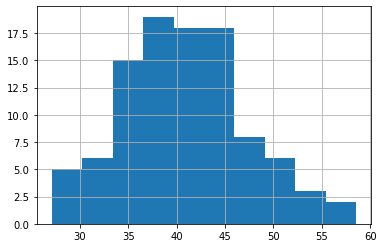

In [12]:
pd.Series(scores).hist()

In [13]:
print('extreme', ' - ', (1 + (pd.Series(scores) > 39.9033).sum())/101)

extreme  -  0.5445544554455446


In [14]:
pd.DataFrame([[sub, sc] for sub, sc in zip(subsets, scores)]).to_csv('../results/credit_card_power.csv', index = False)